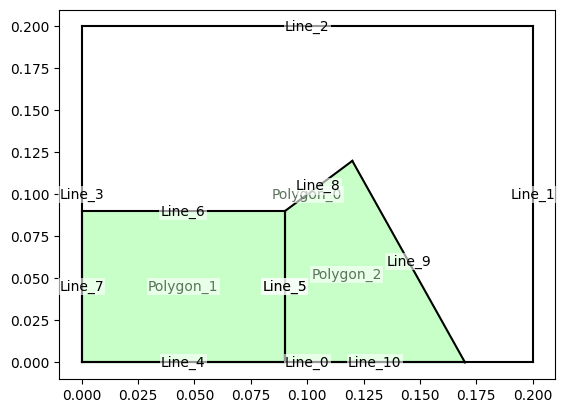

In [1]:
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms

a = geo.Assembly(base_polygon=geo.Polygon([geo.Point(0,0),geo.Point(0.2,0),geo.Point(0.2,0.2), geo.Point(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Point(0,0),geo.Point(0.09,0),geo.Point(0.09,0.09), geo.Point(0,0.09)]),
                               geo.Polygon([geo.Point(0.09, 0), geo.Point(0.09,0.09),geo.Point(0.12,0.12), geo.Point(0.17,0)])])
a.assemble()
fig,ax = plt.subplots()
a.plot(ax, labels=True)
plt.show()

In [2]:
import numpy as np
idx = (1, 5)
asd = np.random.random((6,9))

asd[idx]

0.9938452638017224

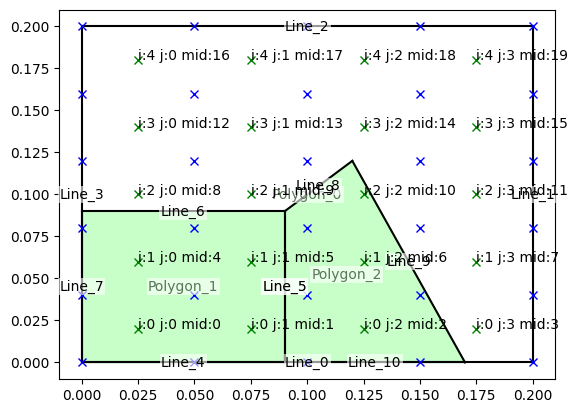

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(4, 0)
(4, 1)
(4, 2)
(4, 3)


In [3]:
rec_m = ms.RectangularConfig(6,5,True)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=True)
plt.show()
for k in range(rec_m.getVolumeNodeNum()):
    ij = rec_m.math2geoVolume(k)
    k2 = rec_m.geo2mathVolume(ij)
    print(ij)
    assert(k2 == k)

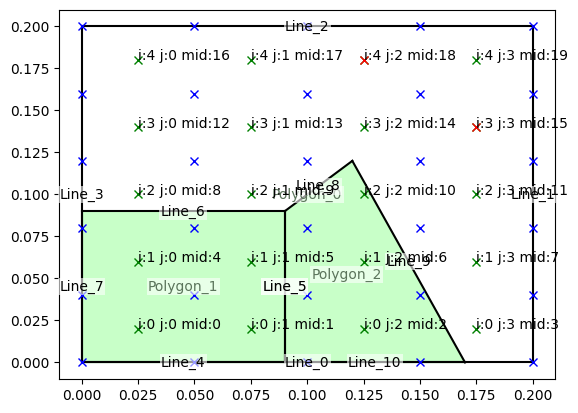

In [4]:
rec_m = ms.RectangularConfig(6,5,True)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=True)

for v in rec_m.getNeighbouringVolumes(19):
    if not v:
        continue
    print(rec_m.getVNode(v))
    rec_m.getVNode(v).plot(ax, fmt = "rx")
    
plt.show()

FACE

0.04999999999999999

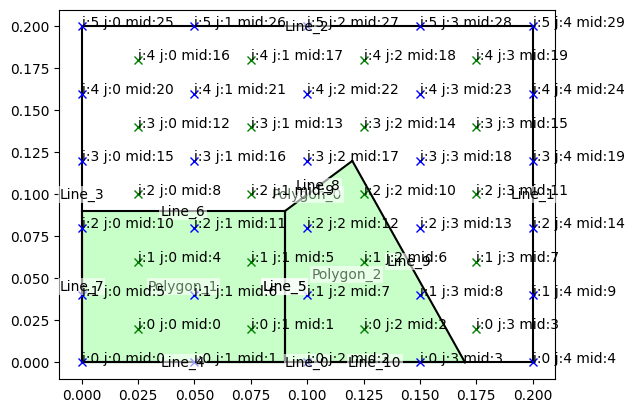

In [5]:
rec_m = ms.RectangularConfig(6,5,True)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=True, fTexts=True)


rec_m.getFaceLength(3,4)

7
8
13
12


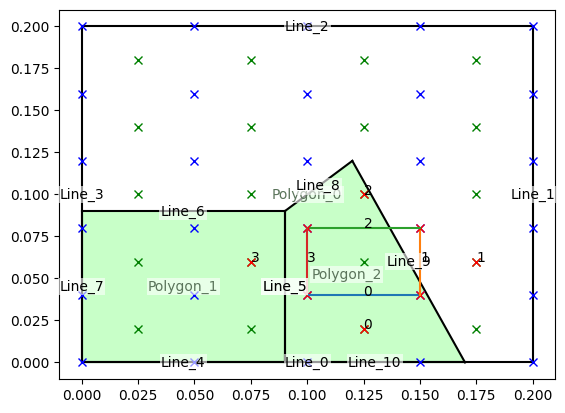

In [6]:
rec_m = ms.RectangularConfig(6,5,True)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=False, fTexts=False)

for k in range(rec_m.getFaceNodeNum()):
    ij = rec_m.math2geoFace(k)
    k2 = rec_m.geo2mathFace(ij)
    #print(ij)
    assert(k2 == k)
selected_v=6
nf = rec_m.getNeighbouringFaces(selected_v)
for k in range(len(nf)):
    f = nf[k]

    print(f)
    fnode = rec_m.getFNode(f)
    nextnode = rec_m.getFNode(nf[(k+1)%len(nf)])
    rec_m.getFNode(f).plot(ax, fmt = "rx")
    ax.plot([fnode.x, nextnode.x], [fnode.y, nextnode.y])
    ax.text(sum([fnode.x, nextnode.x])/2, sum([fnode.y, nextnode.y])/2, str(k))

for idx, v in enumerate(rec_m.getNeighbouringVolumes(selected_v)):
    if not v:
        continue
    rec_m.getVNode(v).plot(ax, fmt = "rx", text = str(idx))

plt.show()

In [7]:
5%5

0